# Exercice: Calcul de pi par la méthode de Monte-Carlo

Les méthodes de Monte-Carlo sont une famille d'algorithmes datant des années 40 permettant la résolution de problèmes d'optimisation, d'intégration ou d'échantillonage. Elles reposent sur le tirage de nombres (pseudo)-aléatoires dont l'espérance de la distribution permet de calculer la quantité recherchée.

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

Le calcul de $\pi$ par la méthode de Monte-Carlo repose sur l'intégration numérique du quart de cercle. L'aire d'un quart de disque unité est:

\begin{equation}
A = \frac{\pi}{4}
\end{equation}

Soit $(X_n)_{n\geq1}$, une suite de variables aléatoires indépendantes et uniformes sur le pavé $[0,1]^2$. L'aire de ce pavé est $S=1$

La probabilité que $X_i$ tombe dans le disque unité est de $\frac{A}{S}=\frac{\pi}{4}$. 

Soit $(Y_n)_{n\geq1}$, une suite de variables aléatoires de Bernouilli. Pour tout $i$, $Y_i$ vaut 1 si $X_i$ est dans le disque unité. $4\mathbb E(Y_0) = \pi$.

Par la loi des grands nombres, la moyenne empirique de $Y_n$ tend vers l'espérance $\mathbb E(Y_0)$:

\begin{equation}
\lim_{n \to \infty} \frac{4}{n} \sum_{i=1}^n Y_i = 4 \mathbb E(Y_0) = \pi
\end{equation}

In [ ]:
# Calculez pi par la méthode de Monte-Carlo

In [2]:
N = 10000

# On tire un grand nombre de points uniformément sur [0,1]^2
x = np.random.random(size=N)
y = np.random.random(size=N)

# On créer un array de booléens indiquant si le point se trouve dans le quart de cercle.
z = (x**2+y**2)<1

# On estime pi
pi_est = 4*z.sum()/N

print('Estimation de pi: {}'.format(pi_est))

Estimation de pi: 3.1252


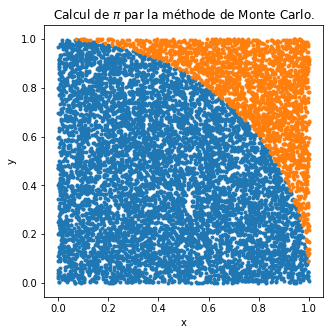

In [6]:
# plt.subplots() permet de créer un objet figure des objets axes.
fig, ax = plt.subplots(1,1,figsize=(5,5))

# L'indexage booléen fait partie des "indexages avancés" de numpy.
# Il est possible de filter un array en l'indexant par un autre array contenant 
# des booléens. On obtient un array plus petit ne contenant que les elements aux emplacements "True".
plt.scatter(x[z], y[z], marker='.')

# Logical not permet d'inverser la valeur logique des éléments d'un np.array.
nz = np.logical_not(z) 
plt.scatter(x[nz], y[nz], marker='.')

# La méthode set de l'objet `axe` permet de spécifier le titre. 
ax.set(title=r"Calcul de $\pi$ par la méthode de Monte Carlo.", 
       xlabel='x',
       ylabel='y')

# La méthode savefig de l'objet `figure` permet de sauvegarder l'image dans un fichier.
# Le format est déduit de l'extension. 
fig.savefig('monte_carlo.png')

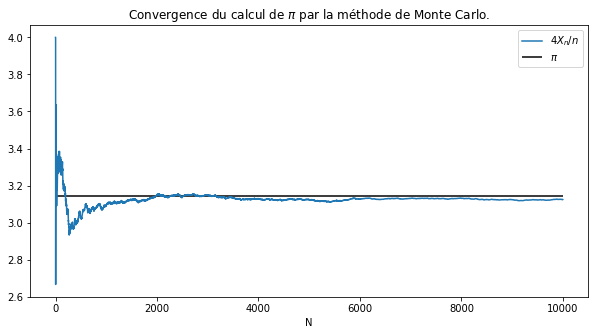

In [7]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
# Notez l'utilisation de np.cumsum(z) qui renvoie un array de la même taille 
# que z mais avec la somme cumulée le long de l'array.
conv = 4*np.cumsum(z)/(np.arange(N)+1)
plt.plot(conv, label=r'$4X_n/n$')
plt.hlines(np.pi, 0, N, label=r'$\pi$')
ax.set(title=r"Convergence du calcul de $\pi$ par la méthode de Monte Carlo.",
      xlabel='N')
plt.legend();